In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("../ANN/Iris.csv")
df = df.drop(columns=["Id"])

# Extract features (first 4 columns) and target (last column)
X = df.iloc[:, :-1].values   # All columns except last (4 feature columns)
y = df.iloc[:, -1].values    # Last column (Species)


In [8]:
import numpy as np
label_map = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}

# Convert labels to numeric, handling both string and numeric inputs
y = np.array([label_map[str(label)] if str(label) in label_map else int(label) for label in y])


In [14]:
# Convert one-hot encoded labels back to class indices
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)



In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train_labels)


,priors,None
,var_smoothing,1e-09


In [17]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='macro')
recall = recall_score(y_test_labels, y_pred, average='macro')
f1 = f1_score(y_test_labels, y_pred, average='macro')
loss = log_loss(y_test_labels, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", loss)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Log Loss: 0.02625269748746407


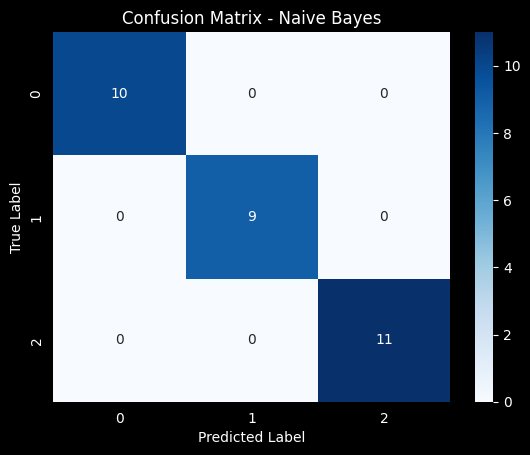

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_labels, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


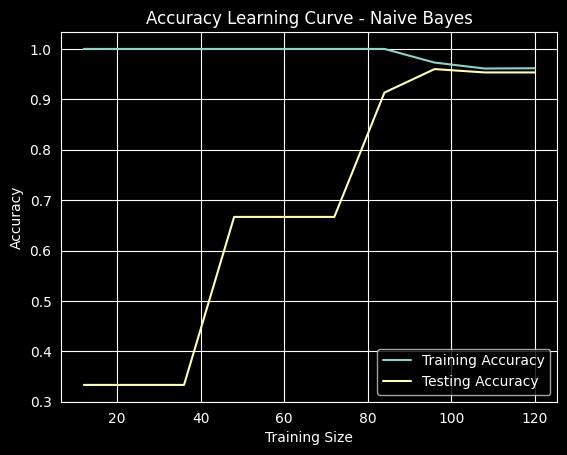

In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model,
    X,
    np.argmax(y, axis=1),
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, test_mean, label="Testing Accuracy")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Accuracy Learning Curve - Naive Bayes")
plt.legend()
plt.show()
